<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Capstone_EVstations_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Charging Locations

## Problem Definition


This notebook analyzes the charging locations in the state of NM. We will only look at Albuquerque DC Fast chargers for this. It will later be joined with ABQ EV registration and ABQ businesses.

### Business Problem


*   Identifying charging locations and planning an optimal site for a new station.

### Data Science Problem


*   Clean and transform data into a new dataframe with relevant information.
*   Mapping total number of DC Fast Chargers (2014-2025)
*   Creating a color map to locate charging deserts









## Data Collection/Sources


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning


Data comes from National Renewable Energy Laboratory which is a the Department of Energy's national lab.

In [2]:
url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.csv?access=all&api_key=BTjBgth23foa0fxXRfHBSe0nMZCxRdXYzCHGhOYi&country=US&download=true&fuel_type=ELEC&state=NM&status=all"

In [3]:
ev_data = pd.read_csv(url)
pd.set_option('display.max_columns', None)  # Show all columns
ev_data

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [4]:
ev_data.shape

(440, 75)

In [5]:
ev_data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN


In [6]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           440 non-null    object 
 1   Station Name                             440 non-null    object 
 2   Street Address                           440 non-null    object 
 3   Intersection Directions                  168 non-null    object 
 4   City                                     440 non-null    object 
 5   State                                    440 non-null    object 
 6   ZIP                                      440 non-null    int64  
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            426 non-null    object 
 9   Status Code                              440 non-null    object 
 10  Expected Date                            19 non-nu

In [7]:
ev_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ZIP,440.0,87517.843182,413.335960,87004.000000,87111.000000,87505.000000,87935.000000,88435.000000
Plus4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BD Blends,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NG Fill Type Code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NG PSI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EV Level1 EVSE Num,3.0,3.000000,3.464102,1.000000,1.000000,1.000000,4.000000,7.000000
EV Level2 EVSE Num,292.0,2.051370,1.510819,1.000000,1.000000,2.000000,2.000000,20.000000
EV DC Fast Count,148.0,3.222973,2.941195,1.000000,1.000000,2.000000,4.000000,16.000000
EV Other Info,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,440.0,34.849144,1.293174,31.830388,34.818033,35.135422,35.661682,36.902166


In [8]:
# check for nulls
ev_data.isnull().sum()

,0
Fuel Type Code,0
Station Name,0
Street Address,0
Intersection Directions,272
City,0
...,...
CNG Station Sells Renewable Natural Gas,440
LNG Station Sells Renewable Natural Gas,440
Maximum Vehicle Class,388
EV Workplace Charging,0


In [9]:
null_ratios = ev_data.isnull().mean()
dropped_cols = null_ratios[null_ratios >= 0.3].index.tolist()
print("Dropped columns (≥ 30% nulls):", dropped_cols)

Dropped columns (≥ 30% nulls): ['Intersection Directions', 'Plus4', 'Expected Date', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Hydrogen Is Retail', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends', 'EV Pricing', 'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures', 'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class', 'LNG Vehicle Class', 'EV On-Site Renewable Source', 'Restricted Access', 'RD Blends', 'RD Blends (French)', 'RD Blended with Biodiese

In [10]:
# convert dates
ev_data['Open Date'] = pd.to_datetime(ev_data['Open Date'], errors='coerce')

In [11]:
ev_clean = ev_data.copy()
ev_clean

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [12]:
filter = ev_clean['City'] == 'Albuquerque'

In [13]:
ev_clean_ABQ = ev_clean[filter]

In [14]:
ev_clean[ev_clean['ZIP'] == 87106]

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
8,ELEC,UNM CORNELL 1,2401 Redondo S Dr,"Cornell Parking Structure, Level 4",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.081831,-106.619140,2025-08-11,75367,2025-08-11 01:03:51 UTC,NaN,NaN,NaN,2016-04-23,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
9,ELEC,UNM YALE 1,1913 Las Lomas Rd NE,"Yale Parking Structure, Level 1",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.087448,-106.621297,2025-08-11,75368,2025-08-11 01:03:51 UTC,NaN,NaN,NaN,2016-04-23,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
26,ELEC,Cutter Aviation Albuquerque - Tesla Destination,2502 Clark-Carr Loop SE,NaN,Albuquerque,NM,87106,NaN,877-798-3752,E,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Tesla Destination,https://www.tesla.com/destination-charging,200-8,35.038494,-106.618818,2024-07-01,114801,2025-02-12 00:16:32 UTC,P,NaN,NaN,2015-11-04,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,AIRPORT,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
56,ELEC,CNM PARKING LOT UPPER SSC,940 University Blvd SE,"First 3hrs, it is $0.25 per kwH and after 3hrs...",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.071878,-106.627366,2025-08-11,143247,2025-08-11 01:24:59 UTC,NaN,NaN,NaN,2019-08-15,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
74,ELEC,CNM PARKING LOT SB 2,Ash St SE,Near northwest corner of Marketplace building ...,Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.075032,-106.629411,2025-08-11,168145,2025-08-11 01:41:44 UTC,NaN,NaN,NaN,2020-11-05,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
93,ELEC,CNM PARKING LOT SB 1,Ash St SE,Near northwest corner of Marketplace building ...,Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN

In [15]:
# Now you can safely extract the year
ev_clean_ABQ['Open Year'] = ev_clean_ABQ['Open Date'].dt.year


/tmp/ipython-input-116225803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_clean_ABQ['Open Year'] = ev_clean_ABQ['Open Date'].dt.year


In [16]:
ev_zip_ABQ = ev_clean_ABQ[['ZIP', 'Status Code', 'Latitude', 'Longitude', 'EV Connector Types','EV DC Fast Count', 'Open Year']]
ev_zip_ABQ

,ZIP,Status Code,Latitude,Longitude,EV Connector Types,EV DC Fast Count,Open Year
4,87110,E,35.087920,-106.562060,J1772,NaN,2012.0
5,87110,E,35.087920,-106.562060,J1772,NaN,2012.0
6,87114,E,35.193238,-106.655819,J1772,NaN,2012.0
7,87114,E,35.193238,-106.655819,J1772,NaN,2012.0
8,87106,E,35.081831,-106.619140,J1772,NaN,2016.0
...,...,...,...,...,...,...,...
408,87111,E,35.134242,-106.522115,J1772,NaN,2025.0
409,87111,E,35.134280,-106.522044,J1772,NaN,2025.0
410,87111,E,35.134243,-106.522100,J1772,NaN,2025.0
430,87102,E,35.080159,-106.638761,J1772,NaN,2025.0


Drop rows that have NaN for 'EV DC Fast Count'. We only want a df with the Fast Count.

In [17]:
ev_zip_ABQ = ev_zip_ABQ.dropna(subset=['EV DC Fast Count'])
ev_zip_ABQ

,ZIP,Status Code,Latitude,Longitude,EV Connector Types,EV DC Fast Count,Open Year
17,87107,E,35.108486,-106.612804,TESLA,6.0,2015.0
54,87107,E,35.112740,-106.606260,CHADEMO J1772COMBO,10.0,2019.0
62,87116,E,35.052600,-106.533285,J1772 J1772COMBO,5.0,2020.0
108,87113,E,35.183643,-106.589520,J1772COMBO,1.0,2021.0
156,87110,E,35.104286,-106.565888,TESLA,16.0,2022.0
201,87110,E,35.096985,-106.564983,CHADEMO J1772COMBO,2.0,2023.0
221,87109,E,35.171800,-106.586601,TESLA,8.0,2023.0
240,87106,E,35.075580,-106.621750,J1772COMBO,6.0,2023.0
250,87114,E,35.188294,-106.661535,CHADEMO J1772COMBO,1.0,2024.0
251,87114,E,35.188312,-106.661583,J1772COMBO TESLA,1.0,2024.0


In [18]:
ev_zip_ABQ.isnull().sum()

,0
ZIP,0
Status Code,0
Latitude,0
Longitude,0
EV Connector Types,0
EV DC Fast Count,0
Open Year,0


In [19]:
ev_zip_ABQ.shape

(25, 7)

Out of the 150 charger locations in ABQ, there are only 25 fast charger locations.

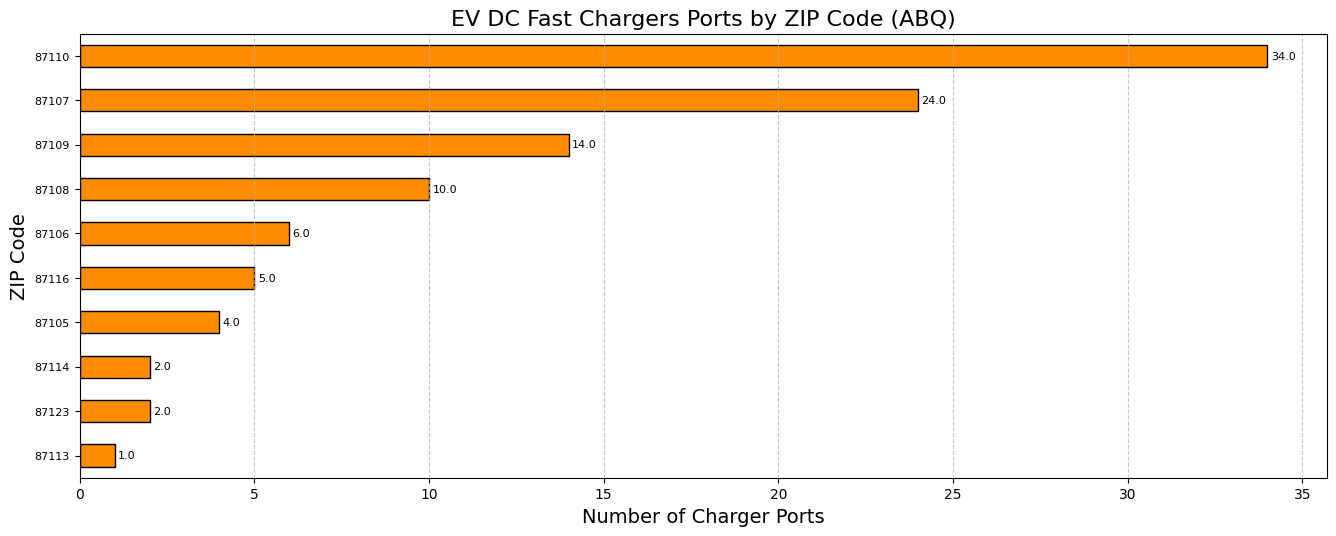

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by ZIP code and sum the DC fast chargers
fast_charger_counts = ev_zip_ABQ.groupby('ZIP')['EV DC Fast Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, max(6, len(fast_charger_counts) * 0.15)))
ax = fast_charger_counts.plot(kind='barh', color='darkorange', edgecolor='black')

plt.title('EV DC Fast Chargers Ports by ZIP Code (ABQ)', fontsize=16)
plt.xlabel('Number of Charger Ports', fontsize=14)
plt.ylabel('ZIP Code', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)
# This line inverts the y-axis so the highest value is at the top
plt.gca().invert_yaxis()

# Add count labels on bars
for i, v in enumerate(fast_charger_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=8)

plt.savefig('dc_fast_chargers_by_zip_bar_chart.png')


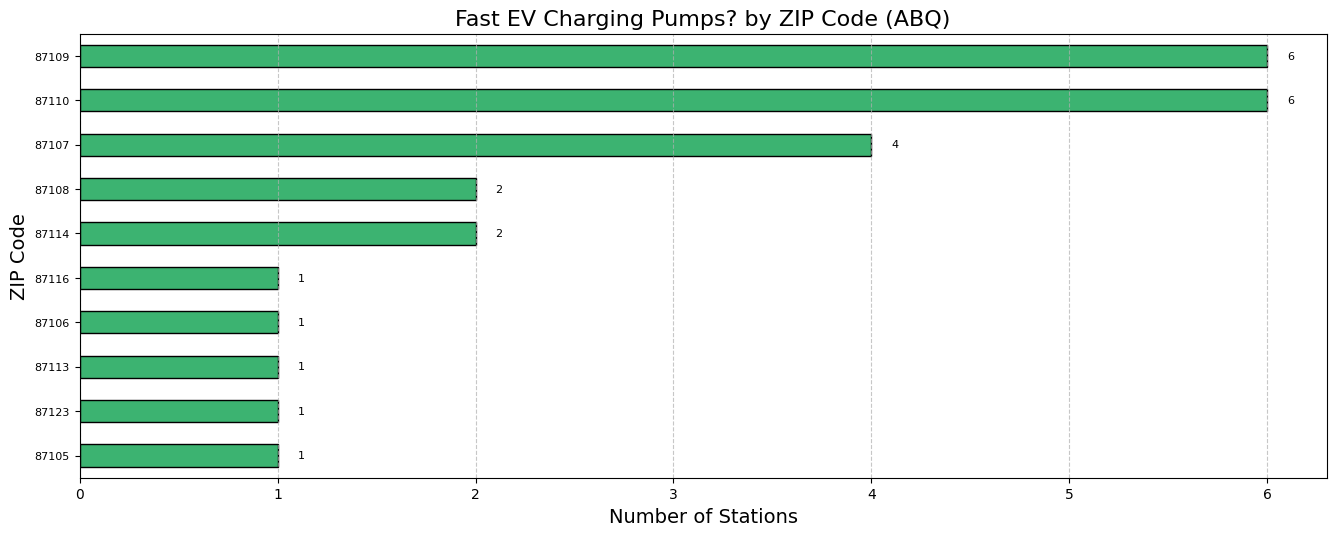

In [21]:
import matplotlib.pyplot as plt

zip_counts = ev_zip_ABQ['ZIP'].value_counts()

plt.figure(figsize=(14, max(6, len(zip_counts) * 0.15)))  # Height scales with number of ZIPs
ax = zip_counts.plot(kind='barh', color='mediumseagreen', edgecolor='black')

plt.title('Fast EV Charging Pumps? by ZIP Code (ABQ)', fontsize=16)
plt.xlabel('Number of Stations', fontsize=14)
plt.ylabel('ZIP Code', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Smaller font if many ZIPs
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)
plt.gca().invert_yaxis()  # Largest on top

# Add station count labels on bars
for i, v in enumerate(zip_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=8)

In [22]:
ev_zip_ABQ['Open Year'].value_counts().sort_index(ascending=True)

,count
Open Year,
2015.0,1
2019.0,1
2020.0,1
2021.0,1
2022.0,1
2023.0,3
2024.0,11
2025.0,6


In [23]:
zip_year_counts = ev_zip_ABQ.groupby(['ZIP', 'Open Year']).size().reset_index(name='Total Stations')

In [24]:
zip_year_pivot = zip_year_counts.pivot(index='Open Year', columns='ZIP', values='Total Stations').fillna(0)

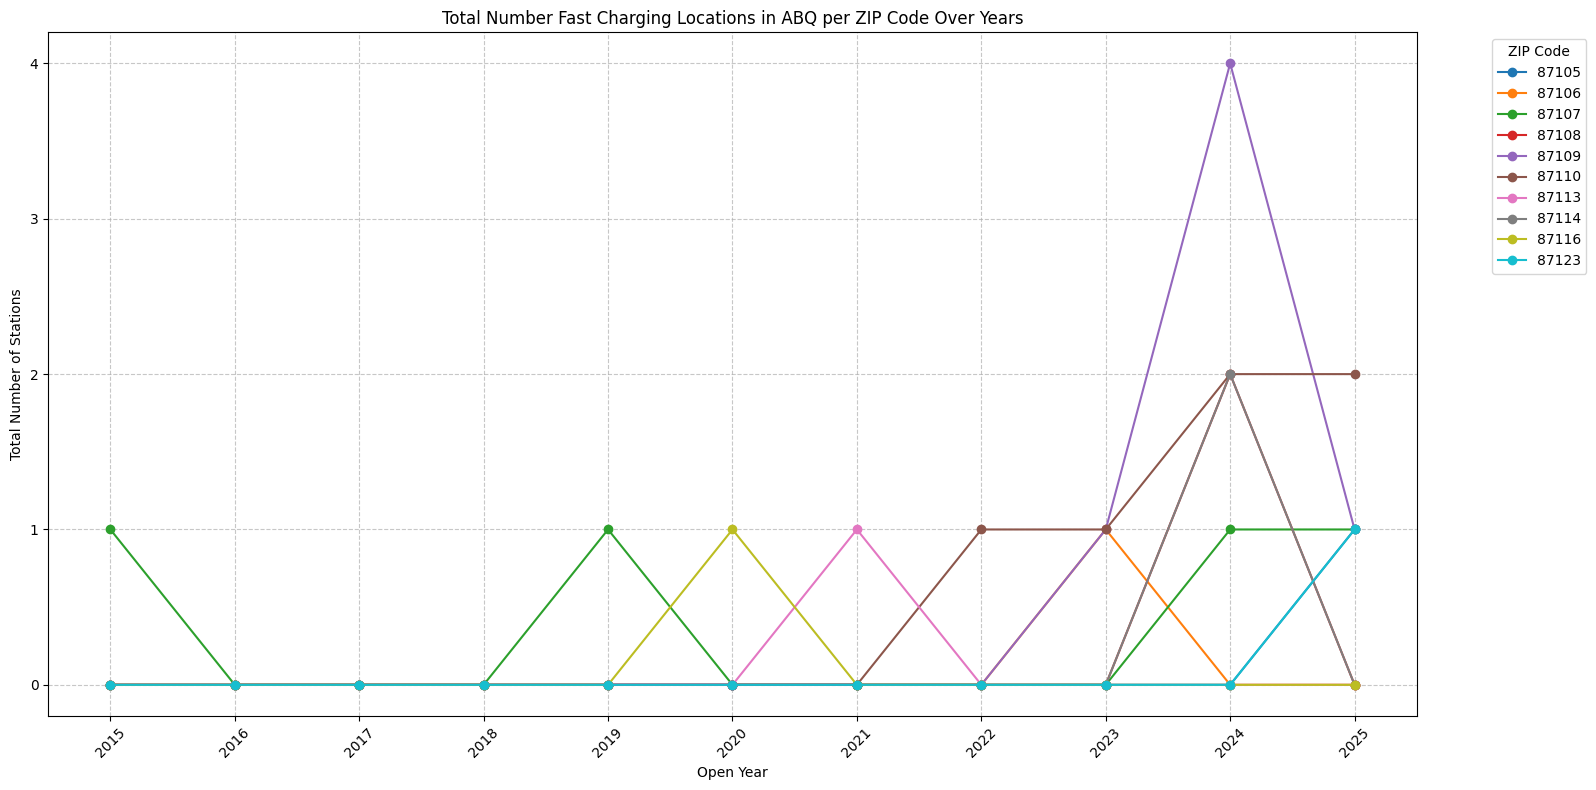

In [25]:
# Create full year range from 2015 to 2025
all_years = np.arange(2015, 2026)  # 2026 is exclusive, so this gives 2012–2025

# Reindex pivot_df to include all years (fill missing with 0)
zip_year_pivot = zip_year_pivot.reindex(all_years, fill_value=0)

zip_year_pivot.plot(figsize=(16, 8), marker='o')

plt.title('Total Number Fast Charging Locations in ABQ per ZIP Code Over Years')
plt.xlabel('Open Year')
plt.ylabel('Total Number of Stations')

# Show every integer on y-axis
plt.yticks(np.arange(0, int(zip_year_pivot.values.max()) + 1, 1))

# Show every year on x-axis
plt.xticks(all_years, rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Legend and layout
plt.legend(title='ZIP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


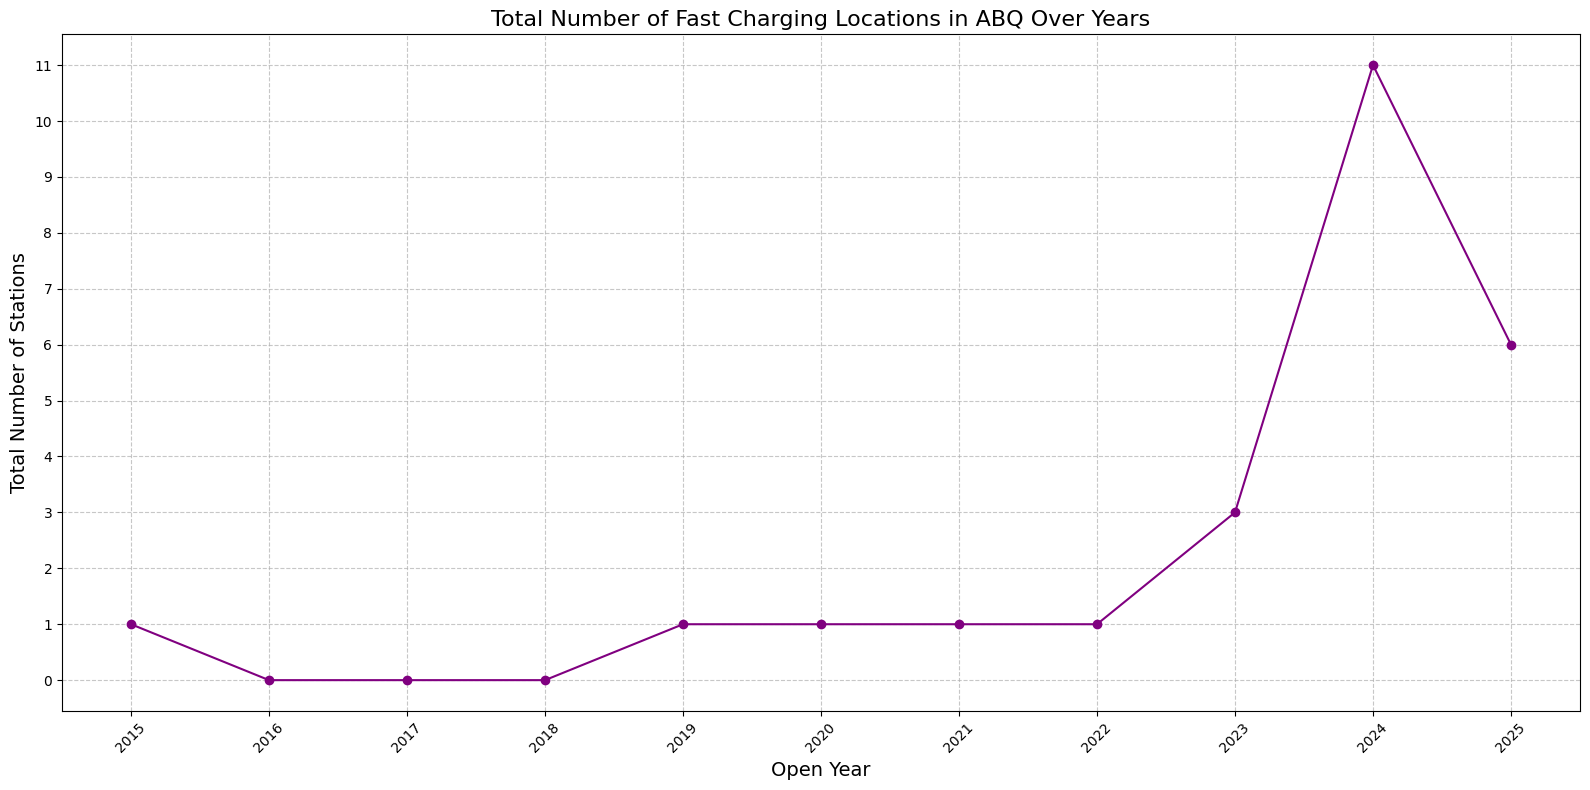

In [26]:
# Calculate the total number of stations for each year by summing across columns
total_stations_per_year = zip_year_pivot.sum(axis=1)

# Plot the total number of stations per year
plt.figure(figsize=(16, 8))
total_stations_per_year.plot(kind='line', marker='o', color='purple')

plt.title('Total Number of Fast Charging Locations in ABQ Over Years', fontsize=16)
plt.xlabel('Open Year', fontsize=14)
plt.ylabel('Total Number of Stations', fontsize=14)

# Show every integer on y-axis, up to the maximum value
plt.yticks(np.arange(0, int(total_stations_per_year.max()) + 1, 1))

# Show every year on x-axis
plt.xticks(total_stations_per_year.index, rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from branca.colormap import linear

# A list of Albuquerque ZIP codes.
abq_zip_codes = [
    87101, 87102, 87103, 87104, 87105, 87106, 87107, 87108, 87109,
    87110, 87111, 87112, 87113, 87114, 87116, 87119, 87120, 87121,
    87122, 87123, 87124, 87125, 87131, 87144, 87151, 87153, 87154,
    87158, 87176, 87181, 87184, 87185, 87187, 87190, 87191, 87192,
    87193, 87194, 87195, 87196, 87197, 87198, 87199
]

# Ensure ZIP column is integer type
ev_zip_ABQ.loc[:, 'ZIP'] = pd.to_numeric(ev_zip_ABQ['ZIP'], errors='coerce').astype('Int64')
df_stations_abq = ev_zip_ABQ[ev_zip_ABQ['ZIP'].isin(abq_zip_codes)].copy()

if df_stations_abq.empty:
    print("\nError: The filtered DataFrame is empty. Please check your data and the list of ZIP codes.")
else:
    print(f"Found {len(df_stations_abq)} total charging ports in the specified Albuquerque ZIP codes.")

    # Sum the existing 'EV DC Fast Count' column for each ZIP code
    fast_chargers_per_zip = df_stations_abq.groupby('ZIP')['EV DC Fast Count'].sum().sort_index()

    print("\nNumber of DC Fast Charger Ports per ZIP code:")
    print(fast_chargers_per_zip)

    # Create a GeoDataFrame from the station data.
    geometry = [Point(xy) for xy in zip(df_stations_abq['Longitude'], df_stations_abq['Latitude'])]
    gdf_stations_abq = gpd.GeoDataFrame(df_stations_abq, geometry=geometry, crs='EPSG:4326')

    # The 'linear.plasma' is a predefined colormap object. We scale it directly.
    zip_code_range = list(gdf_stations_abq['ZIP'].unique())
    zip_code_range.sort()

    zip_colormap = linear.plasma.scale(vmin=min(zip_code_range), vmax=max(zip_code_range))

    m = folium.Map(location=[35.0844, -106.6504], zoom_start=11)

    for idx, row in gdf_stations_abq.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=zip_colormap(row['ZIP']),
            fill=True,
            fill_color=zip_colormap(row['ZIP']),
            fill_opacity=0.7,
            tooltip=f"ZIP: {row['ZIP']}<br>"
                    f"Open Year: {row['Open Year']}<br>"
                    f"DC Fast Charger Ports: {row['EV DC Fast Count']}"
        ).add_to(m)

    m.save('albuquerque_charging_by_zip.html')
    print("\nMap saved to albuquerque_charging_by_zip.html. Open this file in your web browser to view it.")

Found 25 total charging ports in the specified Albuquerque ZIP codes.

Number of DC Fast Charger Ports per ZIP code:
ZIP
87105     4.0
87106     6.0
87107    24.0
87108    10.0
87109    14.0
87110    34.0
87113     1.0
87114     2.0
87116     5.0
87123     2.0
Name: EV DC Fast Count, dtype: float64

Map saved to albuquerque_charging_by_zip.html. Open this file in your web browser to view it.


In [28]:
ev_zip_ABQ.to_csv('ev_zip_ABQ.csv', index=False)

## Exploratory Data Analysis


### Linear Regression

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression

X_multi = ev_zip_ABQ[['Latitude', 'Longitude', 'Open Year']].dropna()
y_multi = ev_zip_ABQ.loc[X_multi.index]['EV DC Fast Count'].dropna()

# Train & fit the model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Print the results
print(f"Intercept: {model_multi.intercept_}")
print(f"Coefficients (Latitude, Longitude, Open Year): {model_multi.coef_}")
print(f"R-squared: {model_multi.score(X_multi, y_multi)}")

Intercept: 1925.831623973122
Coefficients (Latitude, Longitude, Open Year): [-27.70699258  -0.80372325  -0.51124698]
R-squared: 0.23592447221943047


In [30]:
numerical_df = ev_zip_ABQ[['Latitude', 'Longitude', 'EV DC Fast Count', 'Open Year']]
numerical_df.corr()


,Latitude,Longitude,EV DC Fast Count,Open Year
Latitude,1.000000,-0.261155,-0.353499,0.062019
Longitude,-0.261155,1.000000,0.096792,-0.057900
EV DC Fast Count,-0.353499,0.096792,1.000000,-0.354250
Open Year,0.062019,-0.057900,-0.354250,1.000000


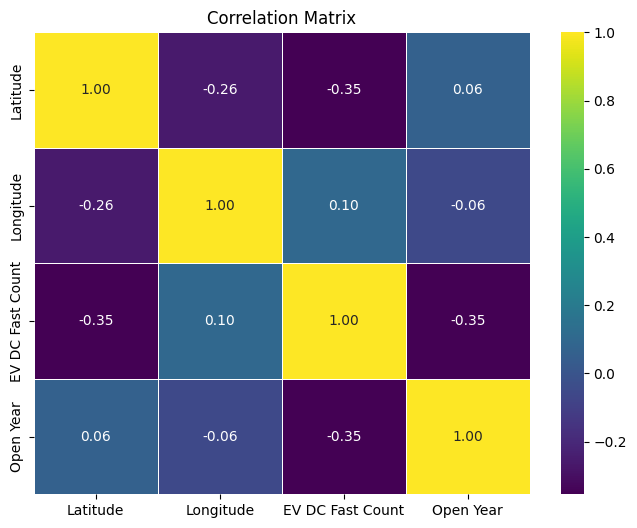

In [31]:
# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Latitude & EV DC : Moderate negative correlation: as latitude increases (i.e., you go north), there are generally fewer DC fast chargers.

EV DC & Open Year :
Moderate negative correlation: newer stations (more recent open years) tend to have fewer fast chargers.


## Processing



Using the coordinates of an electric substation on, I will see where the closest fast charger is.

### 12th St & I-40

In [32]:
import pandas as pd
import numpy as np

# Define your location's coordinates.
my_location_lat = 35.105663
my_location_lon = -106.660211

# Define a function to calculate the Haversine distance in miles.
def haversine_distance_miles(lat1, lon1, lat2, lon2):
    R = 3959  # Radius of Earth in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate the distance from your location to each charging station.
ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(
    lambda row: haversine_distance_miles(
        my_location_lat, my_location_lon, row['Latitude'], row['Longitude']
    ),
    axis=1
)

# Find the closest station.
closest_station = ev_zip_ABQ.loc[ev_zip_ABQ['Distance_miles'].idxmin()]

print(f"The closest EV charging station to your substation is:\n")
print(f"Index: {closest_station.name}")
print(closest_station[['ZIP', 'Latitude', 'Longitude', 'Distance_miles', 'Open Year', 'EV Connector Types']])

The closest EV charging station to your substation is:

Index: 338
ZIP                        87107
Latitude               35.108766
Longitude            -106.614189
Distance_miles          2.610325
Open Year                 2025.0
EV Connector Types    J1772COMBO
Name: 338, dtype: object


/tmp/ipython-input-503790181.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(


In [33]:
ev_data.iloc[339]

,339
Fuel Type Code,ELEC
Station Name,Abraxas Electric LLC
Street Address,505 Moon Street
Intersection Directions,NaN
City,Albuquerque
...,...
CNG Station Sells Renewable Natural Gas,NaN
LNG Station Sells Renewable Natural Gas,NaN
Maximum Vehicle Class,NaN
EV Workplace Charging,False


### Beverly Wood Substation 35.095293, -106.569092


In [34]:
import pandas as pd
import numpy as np

# Define your location's coordinates.
my_location_lat = 35.095293
my_location_lon = -106.569092

# Define a function to calculate the Haversine distance in miles.
def haversine_distance_miles(lat1, lon1, lat2, lon2):
    R = 3959  # Radius of Earth in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate the distance from your location to each charging station.
ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(
    lambda row: haversine_distance_miles(
        my_location_lat, my_location_lon, row['Latitude'], row['Longitude']
    ),
    axis=1
)

# Find the closest station.
closest_station = ev_zip_ABQ.loc[ev_zip_ABQ['Distance_miles'].idxmin()]

print(f"The closest EV charging station to your substation is:\n")
print(f"Index: {closest_station.name}")
print(closest_station[['ZIP', 'Latitude', 'Longitude', 'Distance_miles', 'Open Year', 'EV Connector Types']])

The closest EV charging station to your substation is:

Index: 201
ZIP                                87110
Latitude                       35.096985
Longitude                    -106.564983
Distance_miles                   0.26008
Open Year                         2023.0
EV Connector Types    CHADEMO J1772COMBO
Name: 201, dtype: object


/tmp/ipython-input-1425563249.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(


In [35]:
ev_data.iloc[201]

,201
Fuel Type Code,ELEC
Station Name,GO-STATION Winrock Town Center
Street Address,2100 Louisiana Blvd NE
Intersection Directions,NaN
City,Albuquerque
...,...
CNG Station Sells Renewable Natural Gas,NaN
LNG Station Sells Renewable Natural Gas,NaN
Maximum Vehicle Class,LD
EV Workplace Charging,False


### North Campus Substation 35.0922805, -106.6238051

In [36]:
import pandas as pd
import numpy as np

# Define your location's coordinates.
my_location_lat = 35.0922805
my_location_lon = -106.6238051

# Define a function to calculate the Haversine distance in miles.
def haversine_distance_miles(lat1, lon1, lat2, lon2):
    R = 3959  # Radius of Earth in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate the distance from your location to each charging station.
ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(
    lambda row: haversine_distance_miles(
        my_location_lat, my_location_lon, row['Latitude'], row['Longitude']
    ),
    axis=1
)

# Find the closest station.
closest_station = ev_zip_ABQ.loc[ev_zip_ABQ['Distance_miles'].idxmin()]

print(f"The closest EV charging station to your substation is:\n")
print(f"Index: {closest_station.name}")
print(closest_station[['ZIP', 'Latitude', 'Longitude', 'Distance_miles', 'Open Year', 'EV Connector Types']])

The closest EV charging station to your substation is:

Index: 240
ZIP                        87106
Latitude                35.07558
Longitude             -106.62175
Distance_miles            1.1598
Open Year                 2023.0
EV Connector Types    J1772COMBO
Name: 240, dtype: object


/tmp/ipython-input-42501551.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(


In [37]:
ev_data.iloc[240]

,240
Fuel Type Code,ELEC
Station Name,"Kroger Smiths 443 (Albuquerque, NM)"
Street Address,320 Yale Blvd SE
Intersection Directions,NaN
City,Albuquerque
...,...
CNG Station Sells Renewable Natural Gas,NaN
LNG Station Sells Renewable Natural Gas,NaN
Maximum Vehicle Class,NaN
EV Workplace Charging,False


### Randolph Substation 35.0534621, -106.6249187  
(Near Yale SE & Randolph)

In [38]:
import pandas as pd
import numpy as np

# Define your location's coordinates.
my_location_lat = 35.0534621
my_location_lon = -106.6249187

# Define a function to calculate the Haversine distance in miles.
def haversine_distance_miles(lat1, lon1, lat2, lon2):
    R = 3959  # Radius of Earth in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate the distance from your location to each charging station.
ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(
    lambda row: haversine_distance_miles(
        my_location_lat, my_location_lon, row['Latitude'], row['Longitude']
    ),
    axis=1
)

# Find the closest station.
closest_station = ev_zip_ABQ.loc[ev_zip_ABQ['Distance_miles'].idxmin()]

print(f"The closest EV charging station to your substation is:\n")
print(f"Index: {closest_station.name}")
print(closest_station[['ZIP', 'Latitude', 'Longitude', 'Distance_miles', 'Open Year', 'EV Connector Types']])

The closest EV charging station to your substation is:

Index: 240
ZIP                        87106
Latitude                35.07558
Longitude             -106.62175
Distance_miles          1.538765
Open Year                 2023.0
EV Connector Types    J1772COMBO
Name: 240, dtype: object


/tmp/ipython-input-200865449.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(


In [39]:
ev_data.iloc[240]

,240
Fuel Type Code,ELEC
Station Name,"Kroger Smiths 443 (Albuquerque, NM)"
Street Address,320 Yale Blvd SE
Intersection Directions,NaN
City,Albuquerque
...,...
CNG Station Sells Renewable Natural Gas,NaN
LNG Station Sells Renewable Natural Gas,NaN
Maximum Vehicle Class,NaN
EV Workplace Charging,False


### Broadway SE & Wesmeco 35.0500666, -106.6450334

In [40]:
import pandas as pd
import numpy as np

# Define your location's coordinates.
my_location_lat = 35.0500666
my_location_lon = -106.6450334

# Define a function to calculate the Haversine distance in miles.
def haversine_distance_miles(lat1, lon1, lat2, lon2):
    R = 3959  # Radius of Earth in miles
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate the distance from your location to each charging station.
ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(
    lambda row: haversine_distance_miles(
        my_location_lat, my_location_lon, row['Latitude'], row['Longitude']
    ),
    axis=1
)

# Find the closest station.
closest_station = ev_zip_ABQ.loc[ev_zip_ABQ['Distance_miles'].idxmin()]

print(f"The closest EV charging station to your substation is:\n")
print(f"Index: {closest_station.name}")
print(closest_station[['ZIP', 'Latitude', 'Longitude', 'Distance_miles', 'Open Year', 'EV Connector Types']])

The closest EV charging station to your substation is:

Index: 240
ZIP                        87106
Latitude                35.07558
Longitude             -106.62175
Distance_miles          2.200452
Open Year                 2023.0
EV Connector Types    J1772COMBO
Name: 240, dtype: object


/tmp/ipython-input-577949821.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_zip_ABQ['Distance_miles'] = ev_zip_ABQ.apply(


In [41]:
ev_data.iloc[240]

,240
Fuel Type Code,ELEC
Station Name,"Kroger Smiths 443 (Albuquerque, NM)"
Street Address,320 Yale Blvd SE
Intersection Directions,NaN
City,Albuquerque
...,...
CNG Station Sells Renewable Natural Gas,NaN
LNG Station Sells Renewable Natural Gas,NaN
Maximum Vehicle Class,NaN
EV Workplace Charging,False


## Data Visualization/Communication of Results


From the five substation locations I found, there was a fast charger located, on average, 1.5 miles away from the substation.
Based on this informaton, it would be ideal to be in a proximity to a fast charger. There are other factors to consider as well.

# Merged Dataframes

## Problem Definition

Merging the EV registration, EV chargers & businesses dataframes to analyze patterns.

## Data Collection/Sources

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Cleaning

In [43]:
# EV_users
url = 'https://raw.githubusercontent.com/SPLearning27/DDDS-My-Projects/main/Capstone-Project/ev_data.csv'
ev_users = pd.read_csv(url)
ev_users

,Registration Date,ZIP Code,Vehicle Count,Registration Year
0,2022-03-01,87106,1,2022
1,2019-03-01,88101,1,2019
2,2023-09-01,87501,1,2023
3,2019-09-01,87120,1,2019
4,2019-12-01,87547,1,2019
...,...,...,...,...
18342,2023-08-01,87505,2,2023
18343,2023-08-01,87507,2,2023
18344,2023-08-01,87112,2,2023
18345,2023-08-01,87120,2,2023


In [44]:
ev_users.rename(columns={'ZIP Code': 'ZIP'}, inplace=True)
ev_users

,Registration Date,ZIP,Vehicle Count,Registration Year
0,2022-03-01,87106,1,2022
1,2019-03-01,88101,1,2019
2,2023-09-01,87501,1,2023
3,2019-09-01,87120,1,2019
4,2019-12-01,87547,1,2019
...,...,...,...,...
18342,2023-08-01,87505,2,2023
18343,2023-08-01,87507,2,2023
18344,2023-08-01,87112,2,2023
18345,2023-08-01,87120,2,2023


In [45]:
# Convert ZIP column into string
ev_users['ZIP'] = ev_users['ZIP'].astype(str).str.zfill(5)

In [46]:
abq_zips = [
    '87102', '87104', '87105', '87106', '87107',
    '87108', '87109', '87110', '87111', '87112',
    '87113', '87114', '87120', '87121', '87122',
    '87123'
]

ev_users_abq = ev_users[ev_users['ZIP'].isin(abq_zips)]
ev_users_abq

,Registration Date,ZIP,Vehicle Count,Registration Year
0,2022-03-01,87106,1,2022
3,2019-09-01,87120,1,2019
5,2024-03-01,87113,1,2024
7,2025-03-01,87111,1,2025
8,2025-01-01,87106,1,2025
...,...,...,...,...
18339,2023-08-01,87111,2,2023
18341,2023-08-01,87113,2,2023
18344,2023-08-01,87112,2,2023
18345,2023-08-01,87120,2,2023


In [47]:
# Change 'Registration Year' to just 'Year'
ev_users_zip = ev_users_abq.rename(columns={'Registration Year': 'Year'})
ev_users_zip

,Registration Date,ZIP,Vehicle Count,Year
0,2022-03-01,87106,1,2022
3,2019-09-01,87120,1,2019
5,2024-03-01,87113,1,2024
7,2025-03-01,87111,1,2025
8,2025-01-01,87106,1,2025
...,...,...,...,...
18339,2023-08-01,87111,2,2023
18341,2023-08-01,87113,2,2023
18344,2023-08-01,87112,2,2023
18345,2023-08-01,87120,2,2023


In [48]:
# Don't need registration date
ev_users_zip = ev_users_zip[['ZIP', 'Vehicle Count', 'Year']]
ev_users_zip

,ZIP,Vehicle Count,Year
0,87106,1,2022
3,87120,1,2019
5,87113,1,2024
7,87111,1,2025
8,87106,1,2025
...,...,...,...
18339,87111,2,2023
18341,87113,2,2023
18344,87112,2,2023
18345,87120,2,2023


In [49]:
# Add rolling count data to show counting occurences
ev_users_zip = ev_users_zip.sort_values(by=['ZIP','Year'])

ev_user_counts = (
  ev_users_zip
  .groupby(['ZIP','Year'])
  .size()
  .reset_index(name = 'Vehicle Count')
  # .sort_values(by=['ZIP','Year'])      #  <-- this may not be needed, but wasn't sure
)

ev_user_counts['Vehicle Rolling Count'] = (
  ev_user_counts
  .groupby('ZIP')
  ['Vehicle Count']
  .cumsum()
)

In [50]:
ev_user_counts

,ZIP,Year,Vehicle Count,Vehicle Rolling Count
0,87102,2016,2,2
1,87102,2017,1,3
2,87102,2018,10,13
3,87102,2019,4,17
4,87102,2020,12,29
...,...,...,...,...
176,87123,2021,41,90
177,87123,2022,63,153
178,87123,2023,116,269
179,87123,2024,144,413


In [51]:
# EV chargers
url2 = 'https://raw.githubusercontent.com/brayla-oya/DDDS-My-Projects/main/ev_zip_ABQ%20(1).csv'
ev_charge = pd.read_csv(url2)
ev_charge


,ZIP,Status Code,Latitude,Longitude,EV Connector Types,EV DC Fast Count,Open Year
0,87107,E,35.108486,-106.612804,TESLA,6.0,2015.0
1,87107,E,35.112740,-106.606260,CHADEMO J1772COMBO,10.0,2019.0
2,87116,E,35.052600,-106.533285,J1772 J1772COMBO,5.0,2020.0
3,87113,E,35.183643,-106.589520,J1772COMBO,1.0,2021.0
4,87110,E,35.104286,-106.565888,TESLA,16.0,2022.0
5,87110,E,35.096985,-106.564983,CHADEMO J1772COMBO,2.0,2023.0
6,87109,E,35.171800,-106.586601,TESLA,8.0,2023.0
7,87106,E,35.075580,-106.621750,J1772COMBO,6.0,2023.0
8,87114,E,35.188294,-106.661535,CHADEMO J1772COMBO,1.0,2024.0
9,87114,E,35.188312,-106.661583,J1772COMBO TESLA,1.0,2024.0


In [52]:
# Convert ZIP column into string
ev_charge['ZIP'] = ev_charge['ZIP'].astype(str).str.zfill(5)

In [53]:
# Group by 'Open Year' and 'ZIP', then sum the '# of EV chargers' column
ev_charge_zip = ev_charge.groupby(['Open Year', 'ZIP'])['EV DC Fast Count'].sum().reset_index()
ev_charge_zip

,Open Year,ZIP,EV DC Fast Count
0,2015.0,87107,6.0
1,2019.0,87107,10.0
2,2020.0,87116,5.0
3,2021.0,87113,1.0
4,2022.0,87110,16.0
5,2023.0,87106,6.0
6,2023.0,87109,8.0
7,2023.0,87110,2.0
8,2024.0,87107,4.0
9,2024.0,87108,10.0


In [54]:
# Convert Year to string
ev_charge_zip['Open Year'] = ev_charge_zip['Open Year'].astype('Int64')

In [55]:
# Change 'Open Year' to just 'Year'
ev_charge_zip = ev_charge_zip.rename(columns={'Open Year': 'Year'})
ev_charge_zip

,Year,ZIP,EV DC Fast Count
0,2015,87107,6.0
1,2019,87107,10.0
2,2020,87116,5.0
3,2021,87113,1.0
4,2022,87110,16.0
5,2023,87106,6.0
6,2023,87109,8.0
7,2023,87110,2.0
8,2024,87107,4.0
9,2024,87108,10.0


In [56]:
# Add rolling count data to show counting occurences
ev_charge_zip = ev_charge_zip.sort_values(by=['ZIP','Year'])

ev_charge_zip["EV DC Fast Rolling Count"] = (
  ev_charge_zip
  .groupby('ZIP')
  ['EV DC Fast Count']
  .cumsum()
)

In [57]:
ev_charge_zip

,Year,ZIP,EV DC Fast Count,EV DC Fast Rolling Count
13,2025,87105,4.0,4.0
5,2023,87106,6.0,6.0
0,2015,87107,6.0,6.0
1,2019,87107,10.0,16.0
8,2024,87107,4.0,20.0
14,2025,87107,4.0,24.0
9,2024,87108,10.0,10.0
6,2023,87109,8.0,8.0
10,2024,87109,4.0,12.0
15,2025,87109,2.0,14.0


In [58]:
# EV Businesses
url3 = 'https://raw.githubusercontent.com/SPlearning27/DDDS-My-Projects/main/Capstone-Project/biz_data.csv'
ev_biz = pd.read_csv(url3)
ev_biz

,STATUS,TYPEABBREVIATION,ZIP,Year
0,Active,BRC,87109,2012.0
1,Active,BRC,87109,2011.0
2,Active,BRC,87123,2025.0
3,Active,BRC,87120,2016.0
4,Active,BRC,87105,2008.0
...,...,...,...,...
14898,Active,COM,87112,2025.0
14899,Active,HB,87105,2025.0
14900,Active,HB,87102,2025.0
14901,Active,HB,87107,2025.0


In [59]:
# # Convert ZIP column into string
ev_biz['ZIP'] = ev_biz['ZIP'].astype(str).str.zfill(5)

In [60]:
# Change name of Business Type column
ev_biz = ev_biz.rename(columns={'TYPEABBREVIATION': 'Business Type'})

In [61]:
# COnvert Year to string
ev_biz['Year'] = ev_biz['Year'].astype('Int64')

In [62]:
ev_biz

,STATUS,Business Type,ZIP,Year
0,Active,BRC,87109,2012
1,Active,BRC,87109,2011
2,Active,BRC,87123,2025
3,Active,BRC,87120,2016
4,Active,BRC,87105,2008
...,...,...,...,...
14898,Active,COM,87112,2025
14899,Active,HB,87105,2025
14900,Active,HB,87102,2025
14901,Active,HB,87107,2025


In [63]:
# Add rolling count data to show counting occurences
ev_biz_zip = ev_biz.sort_values(by=['ZIP','Year'])

ev_biz_counts = (
  ev_biz_zip
  .groupby(['ZIP','Year'])
  .size()
  .reset_index(name = 'Business Count')
  # .sort_values(by=['ZIP','Year'])      #  <-- this may not be needed, but wasn't sure
)

ev_biz_counts['Business Rolling Count'] = (
  ev_biz_counts
  .groupby('ZIP')
  ['Business Count']
  .cumsum()
)

### Final Dataframes

In [64]:
ev_biz_counts

,ZIP,Year,Business Count,Business Rolling Count
0,87102,2003,12,12
1,87102,2004,12,24
2,87102,2005,13,37
3,87102,2006,6,43
4,87102,2007,1,44
...,...,...,...,...
381,87131,2011,1,2
382,87131,2016,2,4
383,87131,2019,1,5
384,87131,2020,1,6


In [65]:
indices = ev_biz_counts[ev_biz_counts['ZIP'] == '87114'].index
indices

Index([254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276],
      dtype='int64')

In [66]:
ev_biz_counts.iloc[276]

,276
ZIP,87114
Year,2025
Business Count,201
Business Rolling Count,837


In [67]:
ev_user_counts

,ZIP,Year,Vehicle Count,Vehicle Rolling Count
0,87102,2016,2,2
1,87102,2017,1,3
2,87102,2018,10,13
3,87102,2019,4,17
4,87102,2020,12,29
...,...,...,...,...
176,87123,2021,41,90
177,87123,2022,63,153
178,87123,2023,116,269
179,87123,2024,144,413


In [68]:
ev_charge_zip

,Year,ZIP,EV DC Fast Count,EV DC Fast Rolling Count
13,2025,87105,4.0,4.0
5,2023,87106,6.0,6.0
0,2015,87107,6.0,6.0
1,2019,87107,10.0,16.0
8,2024,87107,4.0,20.0
14,2025,87107,4.0,24.0
9,2024,87108,10.0,10.0
6,2023,87109,8.0,8.0
10,2024,87109,4.0,12.0
15,2025,87109,2.0,14.0


### First Merge: EV Users and EV chargers

In [69]:
# EV users and ev chargers
ev_merge1 = pd.merge(ev_user_counts, ev_charge_zip, on=['ZIP', 'Year'], how='inner').sort_values(by=['ZIP', 'Year'])
ev_merge1

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count
0,87105,2025,50,254,4.0,4.0
1,87106,2023,110,278,6.0,6.0
2,87107,2015,2,2,6.0,6.0
3,87107,2019,24,61,10.0,16.0
4,87107,2024,157,454,4.0,20.0
5,87107,2025,114,568,4.0,24.0
6,87108,2024,79,237,10.0,10.0
7,87109,2023,92,217,8.0,8.0
8,87109,2024,124,341,4.0,12.0
9,87109,2025,80,421,2.0,14.0


### Final Merge

In [70]:
final_ev_merge = pd.merge(ev_merge1, ev_biz_counts, on=['ZIP', 'Year'], how='inner')
final_ev_merge

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count,Business Count,Business Rolling Count
0,87105,2025,50,254,4.0,4.0,266,1095
1,87106,2023,110,278,6.0,6.0,6,610
2,87107,2015,2,2,6.0,6.0,26,347
3,87107,2019,24,61,10.0,16.0,112,835
4,87107,2024,157,454,4.0,20.0,60,986
5,87107,2025,114,568,4.0,24.0,371,1357
6,87108,2024,79,237,10.0,10.0,31,838
7,87109,2023,92,217,8.0,8.0,9,983
8,87109,2024,124,341,4.0,12.0,46,1029
9,87109,2025,80,421,2.0,14.0,398,1427


In [71]:
final_ev_merge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,17.0,2023.000000,2.622022,2015.0,2023.0,2024.0,2025.0,2025.0
Vehicle Count,17.0,94.352941,56.278261,2.0,67.0,92.0,114.0,242.0
Vehicle Rolling Count,17.0,312.352941,183.029691,2.0,217.0,278.0,454.0,602.0
EV DC Fast Count,17.0,5.705882,4.179783,1.0,2.0,4.0,8.0,16.0
EV DC Fast Rolling Count,17.0,12.647059,9.130589,1.0,6.0,12.0,18.0,34.0
Business Count,17.0,114.176471,145.572248,5.0,17.0,46.0,112.0,400.0
Business Rolling Count,17.0,983.647059,400.614519,343.0,636.0,986.0,1295.0,1754.0


## Exploratory Data Analysis

In [72]:
# Calculate EV-to-charger ratio
final_ev_merge["EV Per Charger"] = final_ev_merge["Vehicle Count"] / final_ev_merge["EV DC Fast Count"]
final_ev_merge

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count,Business Count,Business Rolling Count,EV Per Charger
0,87105,2025,50,254,4.0,4.0,266,1095,12.500000
1,87106,2023,110,278,6.0,6.0,6,610,18.333333
2,87107,2015,2,2,6.0,6.0,26,347,0.333333
3,87107,2019,24,61,10.0,16.0,112,835,2.400000
4,87107,2024,157,454,4.0,20.0,60,986,39.250000
5,87107,2025,114,568,4.0,24.0,371,1357,28.500000
6,87108,2024,79,237,10.0,10.0,31,838,7.900000
7,87109,2023,92,217,8.0,8.0,9,983,11.500000
8,87109,2024,124,341,4.0,12.0,46,1029,31.000000
9,87109,2025,80,421,2.0,14.0,398,1427,40.000000


87114 has the highest EV per charger with 121 EVs per 1 charger.

In [73]:
# Flag underserved ZIPs
final_ev_merge["Underserved"] = (final_ev_merge["EV Per Charger"] > final_ev_merge["EV Per Charger"].mean()) & (final_ev_merge["Business Count"] > final_ev_merge["Business Count"].mean())
final_ev_merge

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count,Business Count,Business Rolling Count,EV Per Charger,Underserved
0,87105,2025,50,254,4.0,4.0,266,1095,12.500000,False
1,87106,2023,110,278,6.0,6.0,6,610,18.333333,False
2,87107,2015,2,2,6.0,6.0,26,347,0.333333,False
3,87107,2019,24,61,10.0,16.0,112,835,2.400000,False
4,87107,2024,157,454,4.0,20.0,60,986,39.250000,False
5,87107,2025,114,568,4.0,24.0,371,1357,28.500000,False
6,87108,2024,79,237,10.0,10.0,31,838,7.900000,False
7,87109,2023,92,217,8.0,8.0,9,983,11.500000,False
8,87109,2024,124,341,4.0,12.0,46,1029,31.000000,False
9,87109,2025,80,421,2.0,14.0,398,1427,40.000000,True


In [74]:
ev_per_charger_df = final_ev_merge[['ZIP', 'Year', 'Vehicle Rolling Count', 'EV DC Fast Rolling Count', 'Business Rolling Count', 'EV Per Charger']]
ev_per_charger_df

,ZIP,Year,Vehicle Rolling Count,EV DC Fast Rolling Count,Business Rolling Count,EV Per Charger
0,87105,2025,254,4.0,1095,12.500000
1,87106,2023,278,6.0,610,18.333333
2,87107,2015,2,6.0,347,0.333333
3,87107,2019,61,16.0,835,2.400000
4,87107,2024,454,20.0,986,39.250000
5,87107,2025,568,24.0,1357,28.500000
6,87108,2024,237,10.0,838,7.900000
7,87109,2023,217,8.0,983,11.500000
8,87109,2024,341,12.0,1029,31.000000
9,87109,2025,421,14.0,1427,40.000000


In [75]:
# Sort to see top underserved areas
final_ev_merge.sort_values("EV Per Charger", ascending=False)

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count,Business Count,Business Rolling Count,EV Per Charger,Underserved
15,87114,2024,242,602,2.0,2.0,31,636,121.000000,False
11,87110,2023,112,265,2.0,18.0,17,1295,56.000000,False
16,87123,2025,93,506,2.0,2.0,95,555,46.500000,False
9,87109,2025,80,421,2.0,14.0,398,1427,40.000000,True
4,87107,2024,157,454,4.0,20.0,60,986,39.250000,False
12,87110,2024,141,406,4.0,22.0,59,1354,35.250000,False
8,87109,2024,124,341,4.0,12.0,46,1029,31.000000,False
14,87113,2021,29,51,1.0,1.0,9,343,29.000000,False
5,87107,2025,114,568,4.0,24.0,371,1357,28.500000,False
1,87106,2023,110,278,6.0,6.0,6,610,18.333333,False


In [76]:
# Business denisty per charger
final_ev_merge["Business per Charger"] = final_ev_merge["Business Count"] / final_ev_merge["EV DC Fast Count"]
final_ev_merge

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count,Business Count,Business Rolling Count,EV Per Charger,Underserved,Business per Charger
0,87105,2025,50,254,4.0,4.0,266,1095,12.500000,False,66.500000
1,87106,2023,110,278,6.0,6.0,6,610,18.333333,False,1.000000
2,87107,2015,2,2,6.0,6.0,26,347,0.333333,False,4.333333
3,87107,2019,24,61,10.0,16.0,112,835,2.400000,False,11.200000
4,87107,2024,157,454,4.0,20.0,60,986,39.250000,False,15.000000
5,87107,2025,114,568,4.0,24.0,371,1357,28.500000,False,92.750000
6,87108,2024,79,237,10.0,10.0,31,838,7.900000,False,3.100000
7,87109,2023,92,217,8.0,8.0,9,983,11.500000,False,1.125000
8,87109,2024,124,341,4.0,12.0,46,1029,31.000000,False,11.500000
9,87109,2025,80,421,2.0,14.0,398,1427,40.000000,True,199.000000


In [77]:
# Business Count to Vehicle Count
final_ev_merge["Business Per EV"] = final_ev_merge["Business Count"] / final_ev_merge["Vehicle Count"]
final_ev_merge

,ZIP,Year,Vehicle Count,Vehicle Rolling Count,EV DC Fast Count,EV DC Fast Rolling Count,Business Count,Business Rolling Count,EV Per Charger,Underserved,Business per Charger,Business Per EV
0,87105,2025,50,254,4.0,4.0,266,1095,12.500000,False,66.500000,5.320000
1,87106,2023,110,278,6.0,6.0,6,610,18.333333,False,1.000000,0.054545
2,87107,2015,2,2,6.0,6.0,26,347,0.333333,False,4.333333,13.000000
3,87107,2019,24,61,10.0,16.0,112,835,2.400000,False,11.200000,4.666667
4,87107,2024,157,454,4.0,20.0,60,986,39.250000,False,15.000000,0.382166
5,87107,2025,114,568,4.0,24.0,371,1357,28.500000,False,92.750000,3.254386
6,87108,2024,79,237,10.0,10.0,31,838,7.900000,False,3.100000,0.392405
7,87109,2023,92,217,8.0,8.0,9,983,11.500000,False,1.125000,0.097826
8,87109,2024,124,341,4.0,12.0,46,1029,31.000000,False,11.500000,0.370968
9,87109,2025,80,421,2.0,14.0,398,1427,40.000000,True,199.000000,4.975000


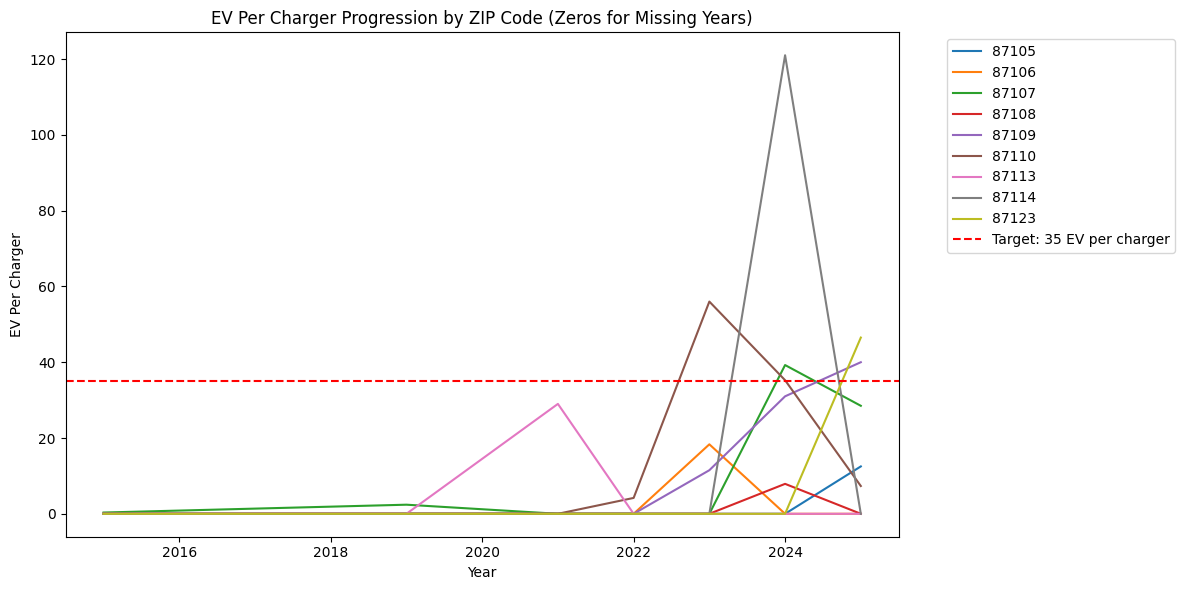

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Get all unique years in the dataset
all_years = sorted(final_ev_merge['Year'].unique())

plt.figure(figsize=(12, 6))

for zip_code, group in final_ev_merge.groupby('ZIP'):
    # Set index to Year for reindexing
    group = group.set_index('Year')

    # Reindex to include all years, filling missing EV Per Charger with 0
    group = group.reindex(all_years, fill_value=0).reset_index()

    # Plot line
    plt.plot(group['Year'], group['EV Per Charger'], label=zip_code)

# Horizontal reference line
plt.axhline(y=35, color='red', linestyle='--', label='Target: 35 EV per charger')

# Labels and title
plt.xlabel('Year')
plt.ylabel('EV Per Charger')
plt.title('EV Per Charger Progression by ZIP Code (Zeros for Missing Years)')

# Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



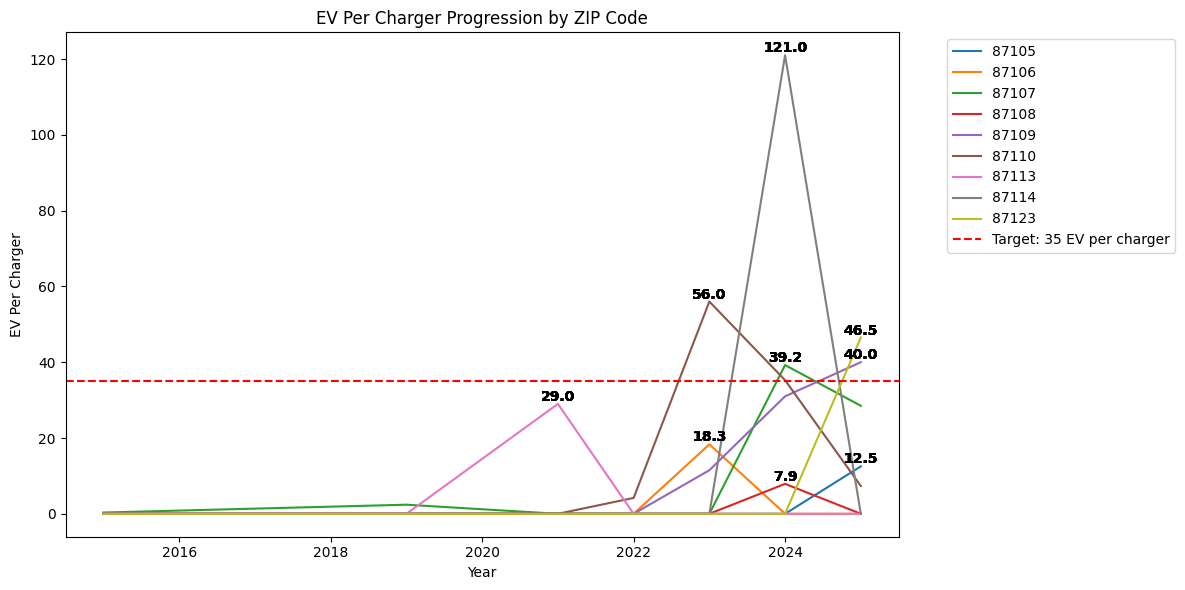

In [79]:
# Get all unique years in the dataset
all_years = sorted(final_ev_merge['Year'].unique())

plt.figure(figsize=(12, 6))

for zip_code, group in final_ev_merge.groupby('ZIP'):
    # Set index to Year for reindexing
    group = group.set_index('Year')

    # Reindex to include all years, filling missing EV Per Charger with 0
    group = group.reindex(all_years, fill_value=0).reset_index()

    # Plot line
    plt.plot(group['Year'], group['EV Per Charger'], label=zip_code)

  # Find the row with the maximum 'EV Per Charger' value for this group
    max_row = group.loc[group['EV Per Charger'].idxmax()]

    # Add text labels for each data point
    for x, y in zip(group['Year'], group['EV Per Charger']):
        # We use f-string to format the text label
        # You can customize the position and format as needed
        # plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

 # Add a text label for the max value at its corresponding coordinate
    # The f-string formats the value to one decimal place
        plt.text(max_row['Year'], max_row['EV Per Charger'], f"{max_row['EV Per Charger']:.1f}", ha='center', va='bottom', fontweight='bold')


# Horizontal reference line
plt.axhline(y=35, color='red', linestyle='--', label='Target: 35 EV per charger')

# Labels and title
plt.xlabel('Year')
plt.ylabel('EV Per Charger')
plt.title('EV Per Charger Progression by ZIP Code')

# Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

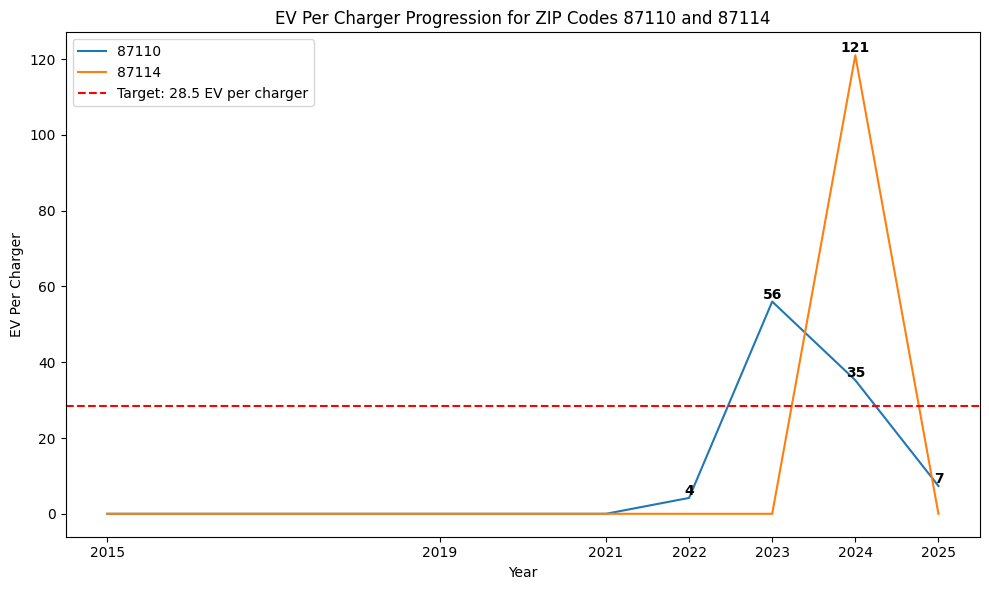

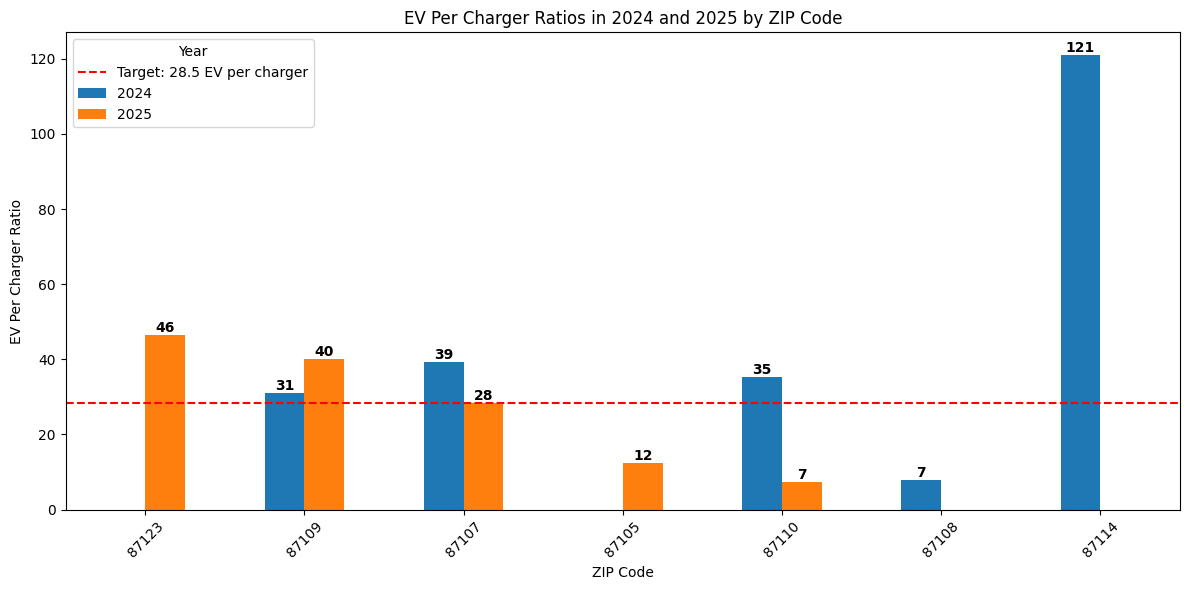

In [80]:
# --- Graph 1: Line plot for ZIP 87110 only ---
# Filter for both ZIP codes
filtered_df = final_ev_merge[final_ev_merge['ZIP'].isin(['87110', '87114'])]

plt.figure(figsize=(10, 6))

# Start of the for loop
for zip_code, group in filtered_df.groupby('ZIP'):

    # === Add the reindexing code here ===
    group = group.set_index('Year').reindex(all_years, fill_value=0).reset_index()
    # ====================================

    # Plot the line for each ZIP code
    plt.plot(group['Year'], group['EV Per Charger'], label=zip_code)

    # Add text labels for each data point
    for x, y in zip(group['Year'], group['EV Per Charger']):
        # Only add a label if the value is not 0
        if y != 0:
            plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set x-axis ticks to show only the integer years from the data
plt.xticks(all_years)

# Horizontal reference line
plt.axhline(y=28.5, color='red', linestyle='--', label='Target: 28.5 EV per charger')

plt.xlabel('Year')
plt.ylabel('EV Per Charger')
plt.title('EV Per Charger Progression for ZIP Codes 87110 and 87114')
plt.legend()
plt.tight_layout()
plt.show()

# --- Graph 2: Bar chart for 2025 ratios ---
# Filter for years 2024 and 2025
ev_2024_2025_df = final_ev_merge[final_ev_merge['Year'].isin([2024, 2025])]

# Pivot the table to create a suitable format for a grouped bar chart
pivot_df = ev_2024_2025_df.pivot_table(index='ZIP', columns='Year', values='EV Per Charger').fillna(0)

# Sort the index based on the values in the 2025 column
pivot_df = pivot_df.sort_values(by=2025, ascending=False)

# Create the grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(12, 6))

# Add the 35 threshold line
plt.axhline(y=28.5, color='red', linestyle='--', label='Target: 28.5 EV per charger')

# Add bolded text labels to each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('ZIP Code')
plt.ylabel('EV Per Charger Ratio')
plt.title('EV Per Charger Ratios in 2024 and 2025 by ZIP Code')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.savefig('ev_2024_2025_ratios.png')

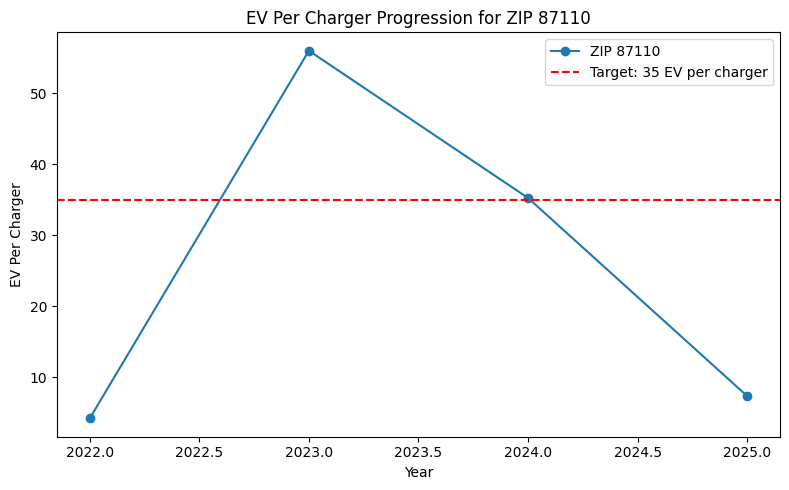

In [81]:
# Choose the ZIP code you want to visualize
target_zip = "87110"  # <-- change this if needed

# Filter data for that ZIP
zip_df = final_ev_merge[final_ev_merge['ZIP'] == target_zip].copy()

# Make sure Year is numeric and sort
zip_df['Year'] = pd.to_numeric(zip_df['Year'], errors='coerce')
zip_df = zip_df.sort_values('Year')

# Plot progression
plt.figure(figsize=(8, 5))
plt.plot(zip_df['Year'], zip_df['EV Per Charger'], marker='o', label=f"ZIP {target_zip}")

# Add horizontal threshold line
plt.axhline(y=35, color='red', linestyle='--', label='Target: 35 EV per charger')

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('EV Per Charger')
plt.title(f'EV Per Charger Progression for ZIP {target_zip}')
plt.legend()
plt.tight_layout()
plt.show()

According to the merged dataframes, the optimal zip code for installing a DC fast charger is 87114. This recommendation is based on a high EV-to-charger ratio of 121. We arrived at this conclusion using 87110 as a reference point, as they increased the number of chargers in response to the rise in EV registrations.